In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

# Loading the image

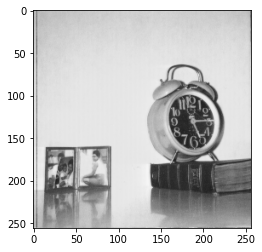

In [2]:
img = cv2.imread('../images/clock.tiff')
plt.imshow(img, cmap='gray');

# Function for out of focus blur

In [10]:
def out_of_focus(img, kernel_size, R):
    # Shape of the image
    M = img.shape[0]
    N = img.shape[1]

    # Radius for Out of focus blur
    kernel = np.zeros((kernel_size, kernel_size))
    
    # Center position
    center = (kernel_size // 2, kernel_size // 2)

    # Construct a kernel
    for i in range(kernel_size):
        for j in range(kernel_size):
            if (i-center[0])**2 + (j-center[1])**2 <= (R**2):
                kernel[i, j] = 1/(np.pi*R*R)
            else:
                kernel[i, j] = 0

    # Use convolution using cv2.filter2D()
    blur_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

    plt.imshow(blur_img, cmap='gray')
    plt.imsave(f'out-of-focus-blur-{kernel_size}.png', blur_img, cmap='gray')

# Running the Out-of-focus blur for various Kernel size

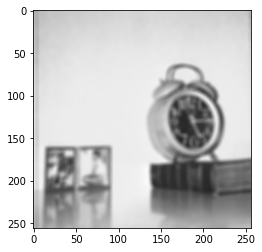

In [11]:
out_of_focus(img, 7, 3)

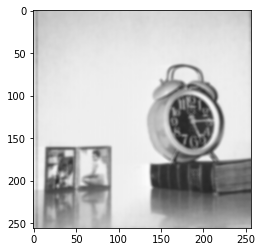

In [12]:
out_of_focus(img, 10, 2)

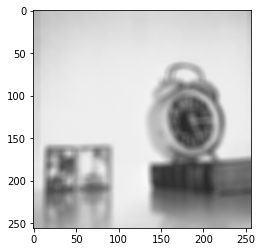

In [15]:
out_of_focus(img, 15, 5)

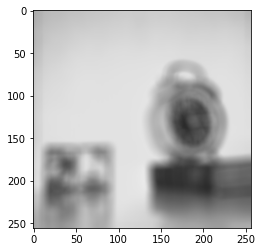

In [21]:
out_of_focus(img, img.shape[0], 8)